In [2]:
#  evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index."
  
    # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#  read the CSV files into DataFrames and perform any necessary data cleaning steps.

#  "* `whale_returns.csv`: Contains returns of some famous \"whale\" investors' portfolios.\n",
whale_returns = Path("whale_returns.csv")
whale = pd.read_csv(whale_returns, index_col = "Date", parse_dates = True,  infer_datetime_format= True)
whale.sort_index(ascending = True, inplace =True)



#     "* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.\n",
algo_returns = Path("algo_returns.csv")  
algo = pd.read_csv(algo_returns, index_col = "Date", parse_dates = True,  infer_datetime_format= True)
algo.sort_index(ascending = True, inplace =True)


#`sp500_history.csv`: Contains historical closing prices of the S&P 500 Index."
sp500_history = Path("sp500_history.csv") 
#Change format of Date to mirror the other Csv files. index_col= identify col, parse_dates= change to year/month/day infer_datetime_format= infrence and chance to int
sp500 = pd.read_csv(sp500_history, index_col = "Date", parse_dates = True,  infer_datetime_format= True)
sp500.sort_index(ascending = True, inplace =True)

# Check Data Types, Convert the S&P 500 closing prices to daily returns. .str necessary .replace remove $ .astype changes from str to float
sp_clean = sp500["Close"].str.replace("$", " ").astype(float)

#pct_change transforms int or float based values into % changes from one value to next
sp500_percent_change = sp_clean.pct_change()




C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [4]:
# Identify and remove null values 
whale.isnull().sum()
whale.dropna(inplace = True)
algo.isnull().sum()
algo.dropna(inplace = True)
sp500_percent_change.isnull().sum()
sp500_percent_change.dropna(inplace = True)


In [5]:
# Rename `Close` Column to be specific to this portfolio.\n" sp500_percent_change entered as a series. To change the name of the column of Close 
# we must convert it to a Dataframe. pd.series() then .to_frame() will convert our series to a Dataframe. reset_index removed the date from the index column and replaced
#it with with a 0-range of our dataset. sp500_df now reflects the other Dataframes. 

sp500_series = pd.Series(sp500_percent_change)
sp500_df = sp500_series.to_frame()
# sp500_df.reset_index(inplace=True) #there was no need for reseting index,all other DF have the index as date and makes joining possible
sp500_df = sp500_df.rename(columns = { "Close": "S&P 500"})


In [6]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# df_combined = pd.concat([whale, sp500_df, algo], axis = 0 )   either pd.concat or .join serve the same purpose
df_combined = whale.join(sp500_df, how='outer', rsuffix='_1').join(algo, how='outer', rsuffix='_2')
df_combined.to_csv(r"C:\Users\Admin\Desktop\4module\practice.csv")

In [7]:
# print(df_combined)

In [8]:
df_combined.dropna(inplace = True)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

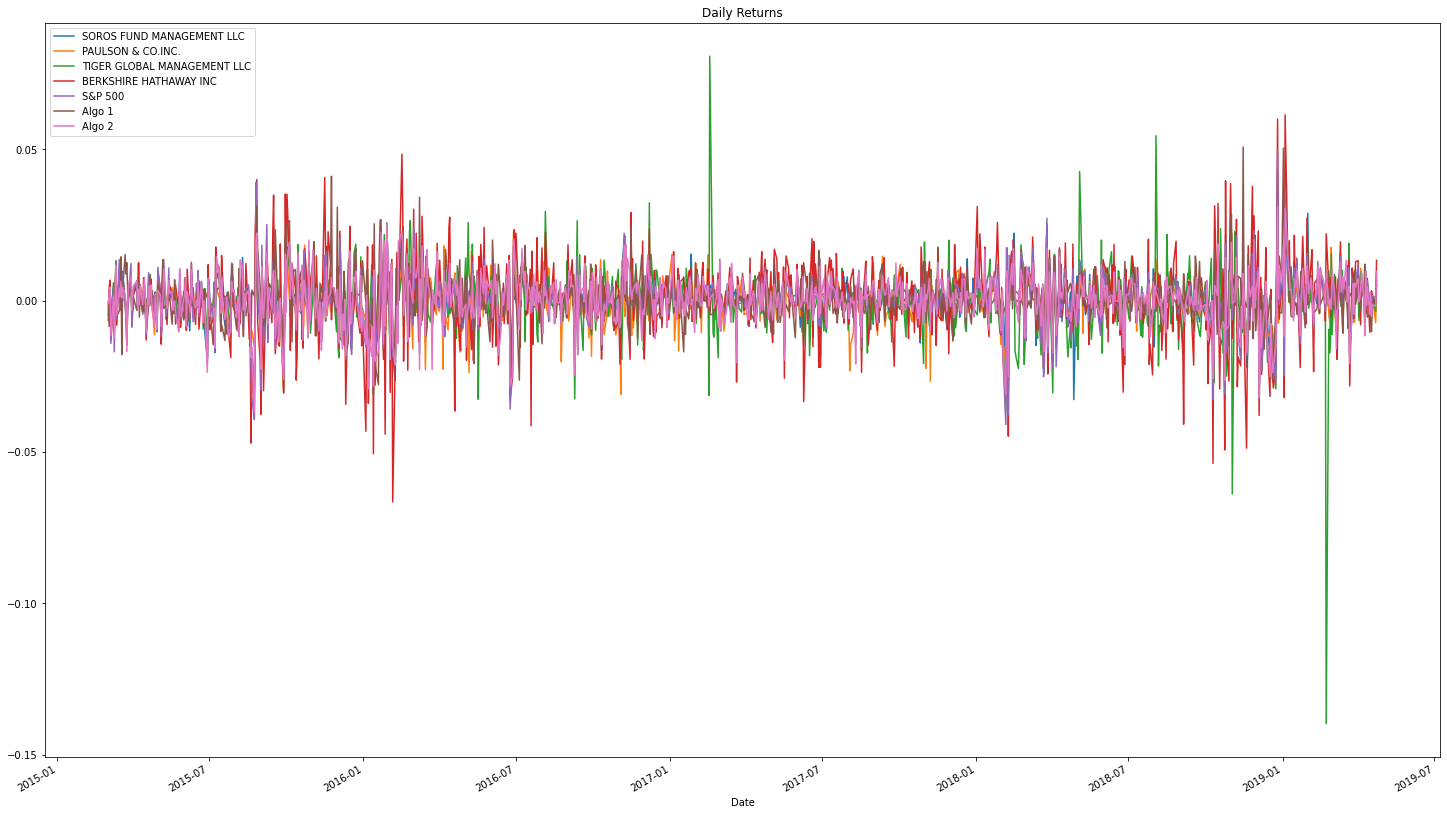

In [9]:
#### Calculate and Plot the daily returns."
#     "# Plot daily returns of all portfolios\n"
df_combined.plot( figsize = (25,15), title = "Daily Returns")



<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

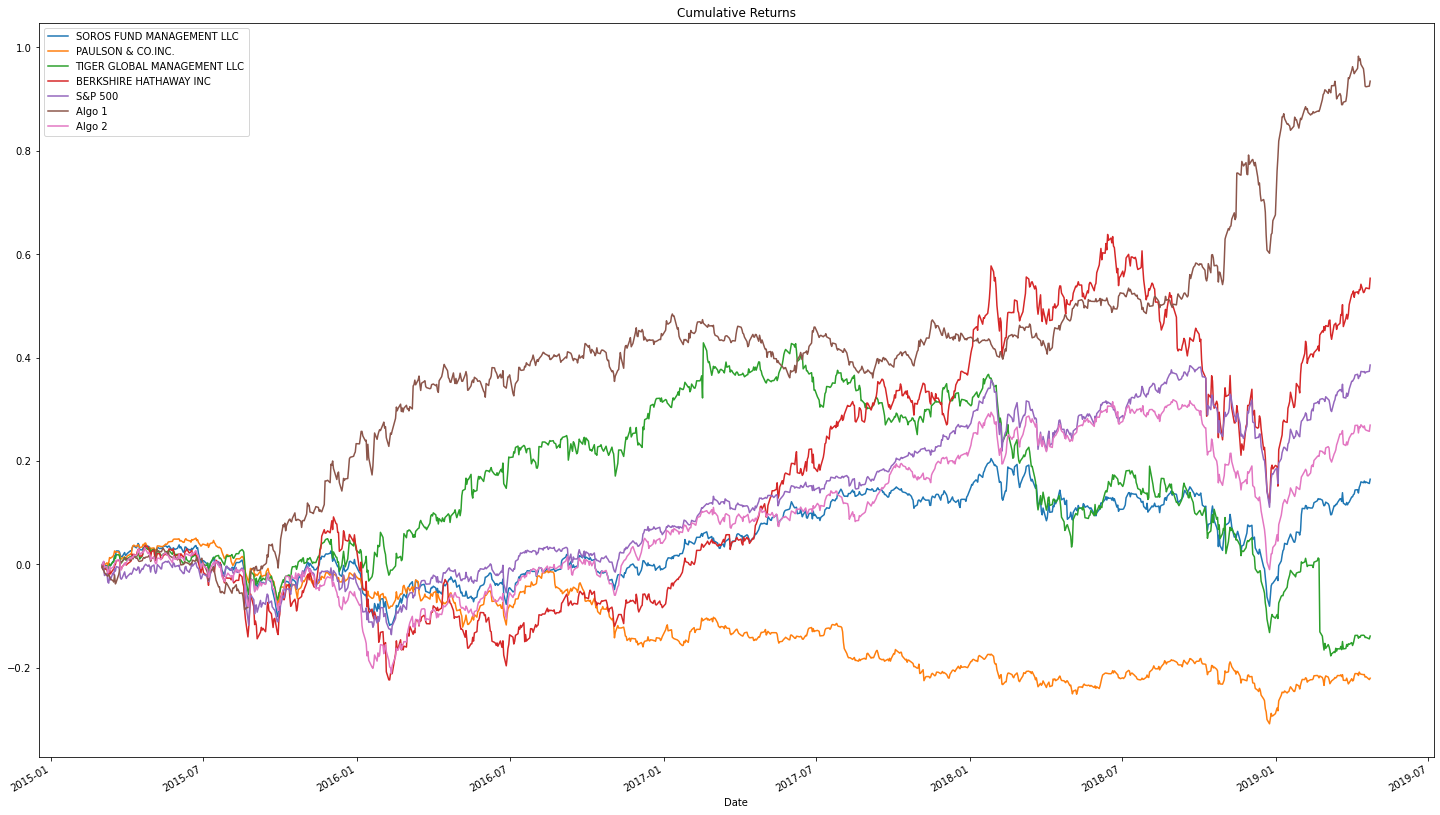

In [10]:
#     "#### Calculate and Plot cumulative returns.
cumulative_returns = (df_combined + 1).cumprod()-1
cumulative_returns.plot( figsize = (25,15), title = "Cumulative Returns")

In [11]:
#  "Determine the _risk_ of each portfolio:\n",


<AxesSubplot:title={'center':'Cumulative Returns'}>

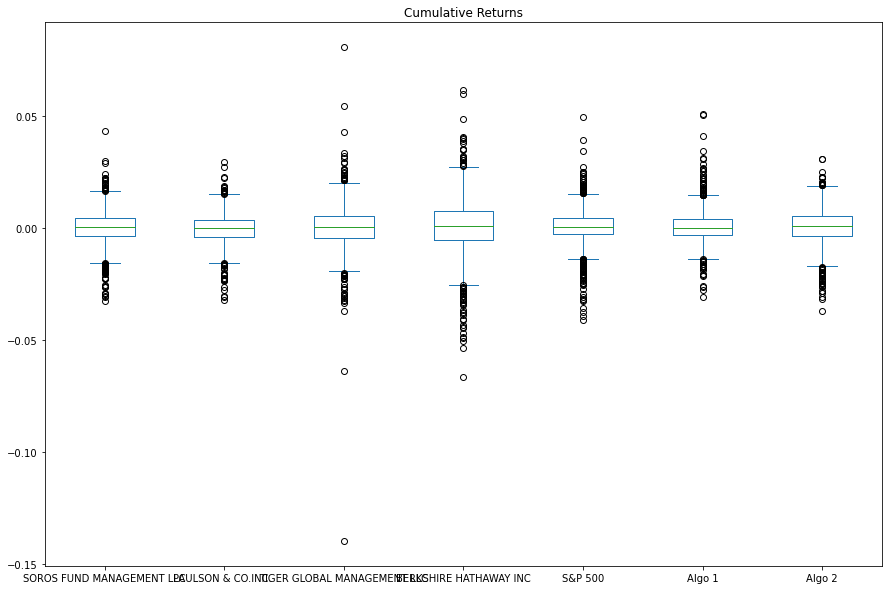

In [12]:
#"1. Create a box plot for each portfolio. \n",
df_combined.plot.box(title = "Cumulative Returns", figsize = (15,10))

In [13]:
#"2. Calculate the standard deviation for all portfolios\n",
std_df = df_combined.std()
#     "# Calculate  the daily standard deviation of S&P 500\n",
std_sp500 = std_df["S&P 500"].std()

#     "4. Determine which portfolios are riskier than the S&P 500\n",
risk_v_sp = std_df > std_df["S&P 500"]
risk_v_sp.head()
#     "5. Calculate the Annualized Standard Deviation"(252 trading days)
annualized_std = std_df * np.sqrt(252)

<AxesSubplot:>

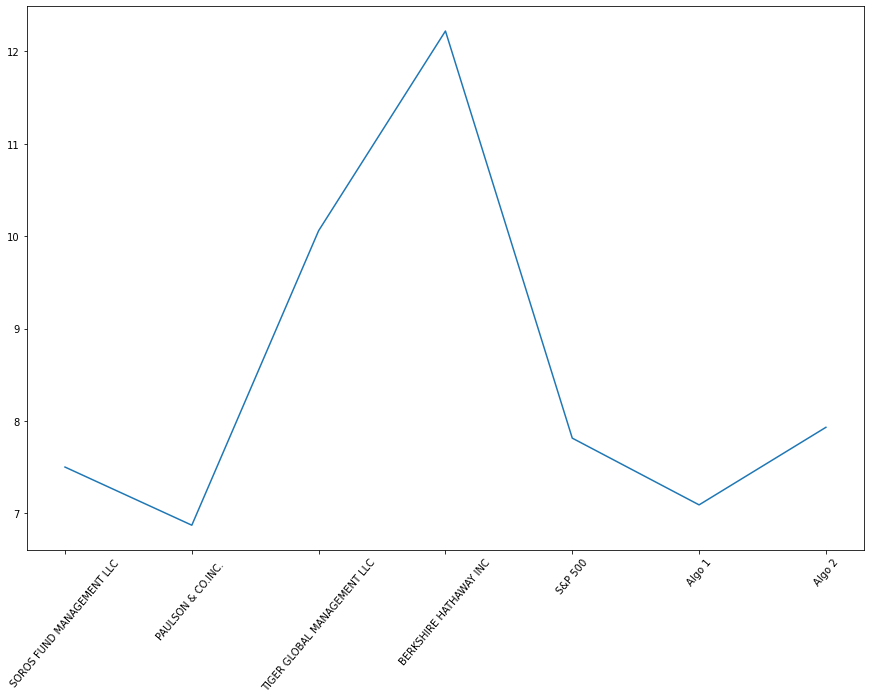

In [14]:
#     "## Rolling Statistics\n",
#     "Risk changes over time. Analyze the rolling statistics for Risk and Beta. \n",
#     "1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window\n",
df_combined.rolling(21).std().sum().plot(rot = 50, figsize = (15, 10))

<AxesSubplot:>

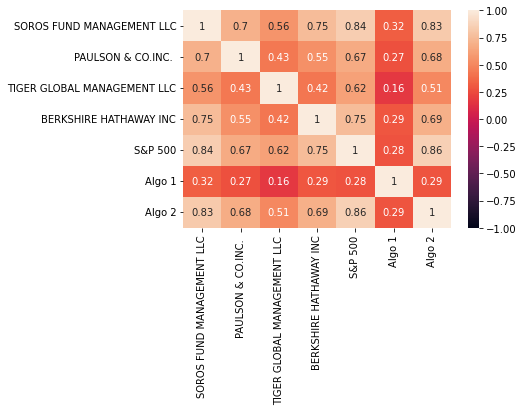

In [15]:
#     "2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500\n",
#     "### Calculate and plot the correlation"#  
df_corr = df_combined.corr()
sns.heatmap(df_corr, vmin = -1, vmax=1, annot = True)


<AxesSubplot:title={'center':'Tiger vs S&P 500 Beta'}, xlabel='Date'>

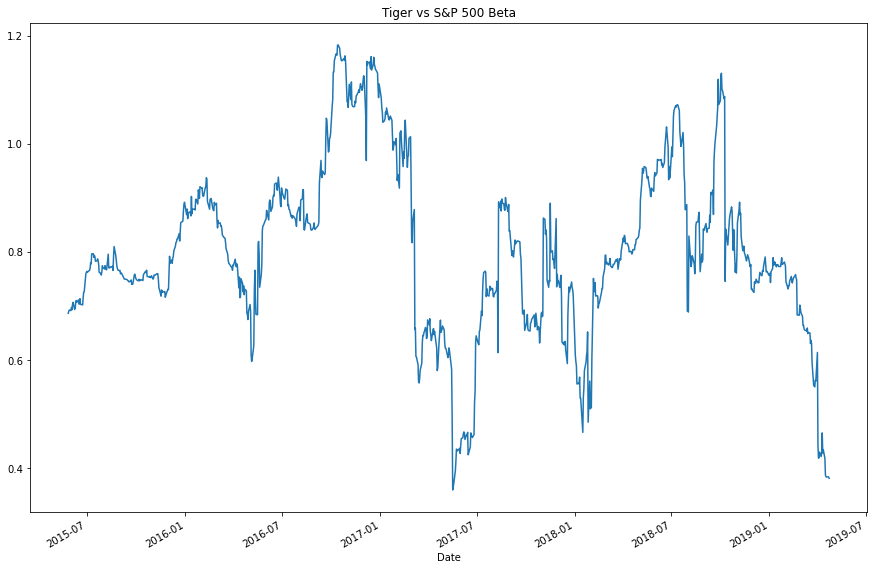

In [21]:
#     "# Calculate variance of S&P 500\n",#     "# Calculate covariance of a single portfolio\n",

covar_tiger = df_combined["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60 ).cov(df_combined["S&P 500"])
var_sp500 = df_combined["S&P 500"].rolling(window=60).var()

#     "3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500"#    
### Calculate and Plot Beta for a chosen portfolio and the S&P 500"#   

beta_tiger_sp500 = covar_tiger/var_sp500

beta_tiger_sp500.plot(title= "Tiger vs S&P 500 Beta", figsize = (15,10))






In [24]:
#     "## Rolling Statistics Challenge: Exponentially Weighted Average \n",
#     "An alternative way to calculate a rolling window is to take the exponentially weighted moving average. 
#This is like a moving window average, but it assigns greater importance to more recent observations.
#Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)
#with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest."
df_combined.ewm(halflife=21, adjust=True).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.000106,0.004700,0.002380
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.003294,0.004162,0.002662
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.006498,0.003419,0.007166
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.007083,0.002999,0.006290


<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

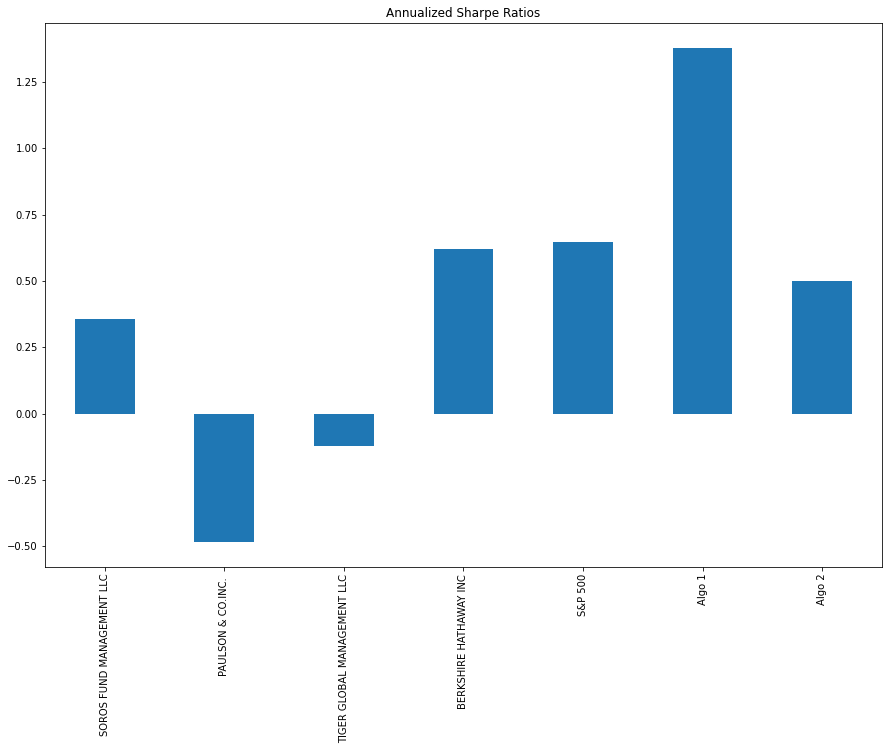

In [28]:

#     "In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, 
#if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?\n",
#     "### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot"
#     "# Annualized Sharpe Ratios\n"
#     "# Visualize the sharpe ratios as a bar plot\n"
annu_sharpe = (df_combined.mean() * 252)/(df_combined.std() * np.sqrt(252)) 
annu_sharpe.plot(kind= "bar", figsize =(15,10), title = "Annualized Sharpe Ratios")




In [ ]:
#     "### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.\n",
#     "Write your answer here!"
# Algo 1 outperforms the general market. 

In [ ]:
# practice.to_csv(r"C:\Users\Admin\Desktop\4thmodule\df_combined_info.csv")

In [ ]:

#     "# Create Custom Portfolio\n",
#     "In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. \n",
#     "1. Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.\n",
#     "2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock\n",
#     "3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns\n",
#     "4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others\n",
#     "5. Include correlation analysis to determine which stocks (if any) are correlated"
#     "## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock."
#     "# Reading data from 1st stock\n"
#     "# Reading data from 2nd stock\n"
#     "# Reading data from 3rd stock\n"
#     "# Combine all stocks in a single DataFrame\n"
#     "# Reset Date index\n"
#     "# Reorganize portfolio data by having a column per symbol\n"
#     "# Calculate daily returns\n",
#     "# Display sample data\n"
#     "## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock"
#     "# Set weights\n",
#     "weights = [1/3, 1/3, 1/3]\n",
#     "# Calculate portfolio return\n",
#     "# Display sample data\n"
#     "## Join your portfolio returns to the DataFrame that contains all of the portfolio returns"
#     "# Join your returns DataFrame to the original returns DataFrame\n"
#     "# Only compare dates where return data exists for all the stocks (drop NaNs)\n"
#     "## Re-run the risk analysis with your portfolio to see how it compares to the others"
#     "### Calculate the Annualized Standard Deviation"
#     "# Calculate the annualized `std`\n"
#     "### Calculate and plot rolling `std` with 21-day window"
#     "# Calculate rolling standard deviation\n",
#     "# Plot rolling standard deviation\n"
#     "### Calculate and plot the correlation"
#     "# Calculate and plot the correlation\n"
#     "### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500"
#     "# Calculate and plot Beta\n"
#     "### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot"
#     "# Calculate Annualized Sharpe Ratios\n"
#     "# Visualize the sharpe ratios as a bar plot\n"
#     "### How does your portfolio do?\n",
#     "Write your answer here!"